<a href="https://colab.research.google.com/github/kilaspintas/Tubes-Kecerdasan-Buatan/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

!mkdir model
local_zip = '/content/drive/MyDrive/images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/model')
zip_ref.close()

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                   

<ipython-input-3-5eca1a387abb>:117: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 2.1316 - accuracy: 0.2020
Epoch 1: val_accuracy improved from -inf to 0.10966, saving model to /content/drive/MyDrive/model/model.h5
40/40 [==============================] - 187s 5s/step - loss: 2.1316 - accuracy: 0.2020 - val_loss: 45.7283 - val_accuracy: 0.1097 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 1.9687 - accuracy: 0.2613
Epoch 2: val_accuracy improved from 0.10966 to 0.13594, saving model to /content/drive/MyDrive/model/model.h5
40/40 [==============================] - 182s 5s/step - loss: 1.9687 - accuracy: 0.2613 - val_loss: 8.7052 - val_accuracy: 0.1359 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 1.9020 - accuracy: 0.2633
Epoch 3: val_accuracy improved from 0.13594 to 0.16918, saving model to /content/drive/MyDrive/model/model.h5
40/40 [==============================] - 181s 5s/step - loss: 1.9020 - accuracy: 0.2633 - val_loss: 3

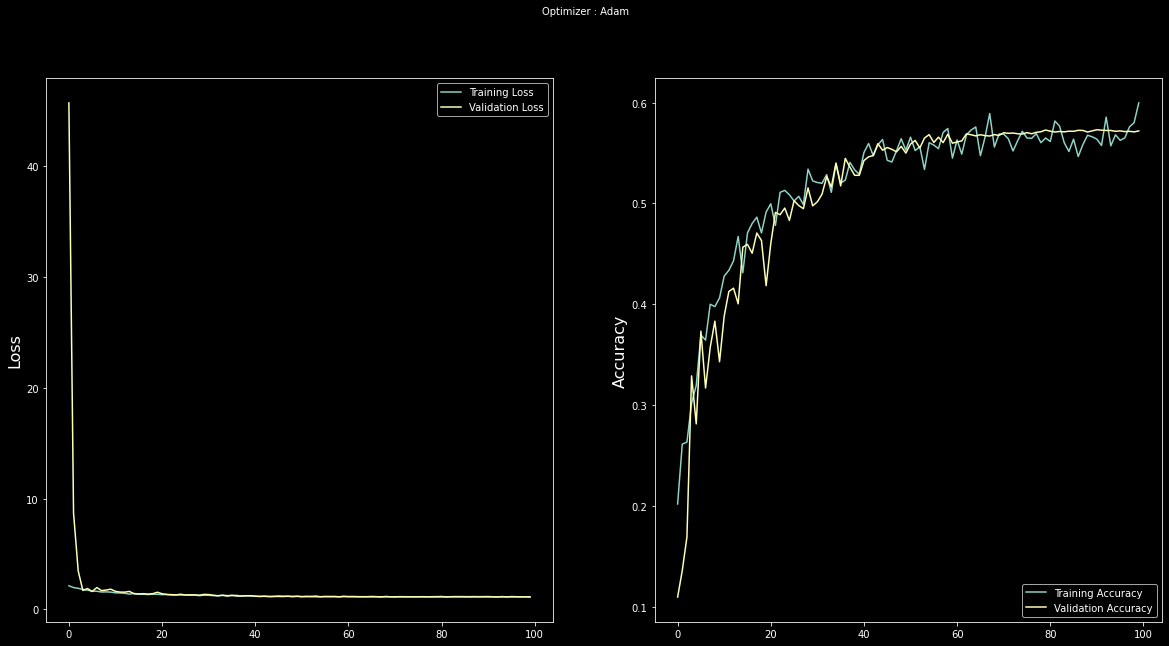

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.image_utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

batch_size  = 64
picture_size = 48
no_of_classes = 7
model = Sequential()
epochs = 100
opt = Adam(lr = 0.0001)

folder_path = "/model/images/"

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint("/content/drive/MyDrive/model/model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=100,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(generator=train_set,
                                #steps_per_epoch=train_set.n//train_set.batch_size,
                                steps_per_epoch=40,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

#model.save("/content/drive/MyDrive/model/model.h5")

plt.style.use("dark_background")
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/model/plot.png')

